In [ ]:
from keras.datasets import imdb
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, SimpleRNN, LSTM, GRU
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.datasets import reuters
import numpy as np
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers

In [ ]:
# graph function
def graph():
    plt.figure(figsize = (12,4))
    
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], 'b-', label = 'loss')
    plt.plot(history.history['val_loss'], 'y--', label = 'val_loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
    plt.plot(history.history['val_accuracy'], 'r--', label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylim([0.2, 1])
    plt.legend()

    return plt.show()

#IMDB dataset

In [ ]:
# load dataset
max_features = 10000
maxlen = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

##Baseline : acc = 0.8765

In [ ]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 8)            80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 4000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4001      
Total params: 84,001
Trainable params: 84,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 4s 6ms/step - loss: 0.5632 - acc: 0.7155 - val_loss: 0.3709 - val_acc: 0.8528
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2853 - acc: 0.8892 - val_loss: 0.2845 - val_acc: 0.8878
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2197 - acc: 0.9155 - val_loss: 0.2712 - 

782/782 [==============================] - 2s 3ms/step - loss: 0.3429 - acc: 0.8765


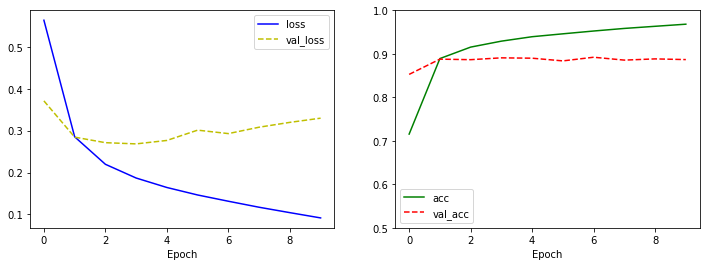

In [ ]:
results = model.evaluate(x_test, y_test)
graph()

##Using RNN : acc = 0.8641 

In [ ]:
max_features = 10000  
maxlen = 500  
batch_size = 32

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [ ]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 8)            80000     
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                1312      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 81,345
Trainable params: 81,345
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 348s 555ms/step - loss: 0.6675 - acc: 0.5710 - val_loss: 0.5068 - val_acc: 0.7570
Epoch 2/10
625/625 [==============================] - 346s 554ms/step - loss: 0.4117 - acc: 0.8238 - val_loss: 0.9369 - val_acc: 0.6352
Epoch 3/10
625/625 [==============================] - 348s 557ms/step - loss: 0.3294 - acc: 0.8675 - val_los

782/782 [==============================] - 42s 53ms/step - loss: 0.3697 - acc: 0.8641


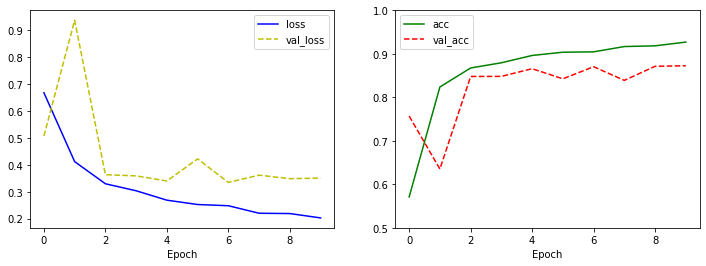

In [ ]:
results = model.evaluate(x_test, y_test)
graph()

##Using LSTM : acc = 0.8707

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 66s 98ms/step - loss: 0.4353 - acc: 0.8031 - val_loss: 0.3215 - val_acc: 0.8702
Epoch 2/10
625/625 [==============================] - 61s 97ms/step - loss: 0.2678 - acc: 0.8934 - val_loss: 0.3138 - val_acc: 0.8796
Epoch 3/10
625/625 [==============================] - 60s 96ms/step - loss: 0.2240 - acc: 0.9160 - val_loss: 0

782/782 [==============================] - 22s 28ms/step - loss: 0.3538 - acc: 0.8707


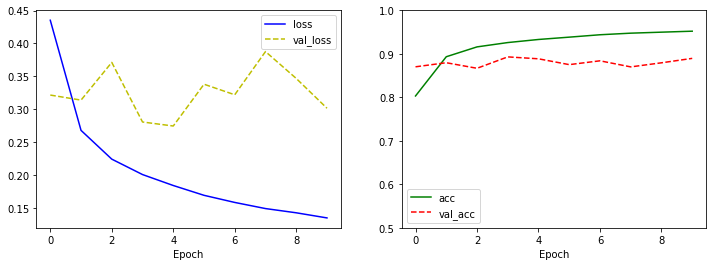

In [ ]:
results = model.evaluate(x_test, y_test)
graph()

##Using GRU : acc = 0.8852

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
gru (GRU)                    (None, 32)                6336      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 326,369
Trainable params: 326,369
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 95s 99ms/step - loss: 0.4611 - acc: 0.7724 - val_loss: 0.3409 - val_acc: 0.8570
Epoch 2/10
625/625 [==============================] - 61s 98ms/step - loss: 0.2909 - acc: 0.8858 - val_loss: 0.2917 - val_acc: 0.8814
Epoch 3/10
625/625 [==============================] - 61s 98ms/step - loss: 0.2250 - acc: 0.9132 - val_loss: 0

782/782 [==============================] - 23s 29ms/step - loss: 0.3229 - acc: 0.8852


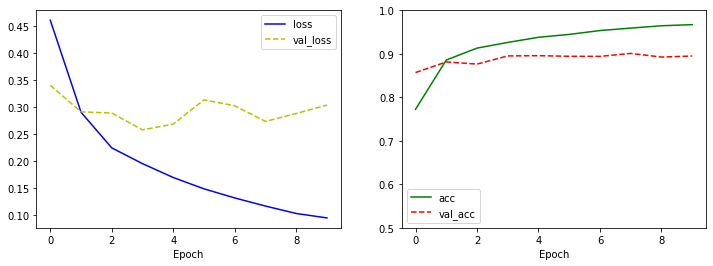

In [ ]:
results = model.evaluate(x_test, y_test)
graph()

#Reuters dataset

In [ ]:
max_features = 10000
maxlen = 500

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(train_data, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(test_data, maxlen=maxlen)

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

2121728/2110848 [==============================] - 0s 0us/step


##Baseline : acc = 0.7867

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_36 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_37 (Dense)             (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 32ms/step - loss: 2.7091 - accuracy: 0.5371 - val_loss: 1.7750 - val_accuracy: 0.6390
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.4420 - accuracy: 0.7033 - val_loss: 1.3331 - val_accuracy: 0.7160
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.0685 - accuracy: 0.7681 - val_loss: 1.1673 - val_accuracy: 0.7370
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8399 - accuracy: 0.8217 - val_loss: 1.0947 - val_accuracy: 0.7490
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6755 - accuracy: 0.8557 - val_loss: 0.9941 - val_accuracy: 0.8030
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5386 - accuracy: 0.8886 - val_loss: 0.9437 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.4383 - accuracy: 0.9094 - val_loss: 0.8954 - val_accuracy: 0.8070
Epoch 8/20
16

71/71 [==============================] - 0s 4ms/step - loss: 1.2018 - accuracy: 0.7867


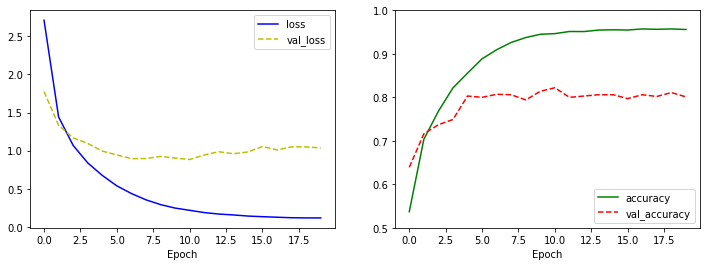

In [ ]:
results = model.evaluate(x_test, one_hot_test_labels)
graph()

##Using RNN : acc = 0.4795 

In [ ]:
model = models.Sequential()
model.add(layers.Embedding(10000, 64))
model.add(layers.SimpleRNN(64))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2990      
Total params: 651,246
Trainable params: 651,246
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
57/57 [==============================] - 37s 627ms/step - loss: 2.7577 - accuracy: 0.3365 - val_loss: 2.4075 - val_accuracy: 0.3450
Epoch 2/10
57/57 [==============================] - 35s 619ms/step - loss: 2.1638 - accuracy: 0.4487 - val_loss: 2.1571 - val_accuracy: 0.4057
Epoch 3/10
57/57 [==============================] - 35s 613ms/step - loss: 1.8955 - accuracy

71/71 [==============================] - 3s 46ms/step - loss: 2.1717 - accuracy: 0.4795


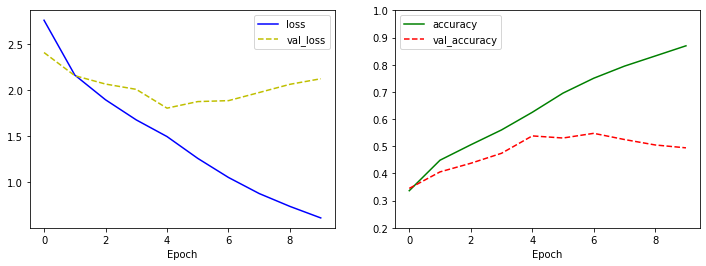

In [ ]:
results = model.evaluate(x_test, y_test)
graph()

##Using LSTM : acc = 0.6674

In [ ]:
model = models.Sequential()
model.add(layers.Embedding(10000, 64))
model.add(layers.LSTM(64))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_6 (Dense)              (None, 46)                2990      
Total params: 676,014
Trainable params: 676,014
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
57/57 [==============================] - 7s 92ms/step - loss: 2.5085 - accuracy: 0.3801 - val_loss: 2.1153 - val_accuracy: 0.4763
Epoch 2/30
57/57 [==============================] - 4s 78ms/step - loss: 2.0174 - accuracy: 0.4788 - val_loss: 2.0079 - val_accuracy: 0.4775
Epoch 3/30
57/57 [==============================] - 4s 79ms/step - loss: 1.8424 - accuracy: 0.51

71/71 [==============================] - 2s 34ms/step - loss: 1.7632 - accuracy: 0.6674


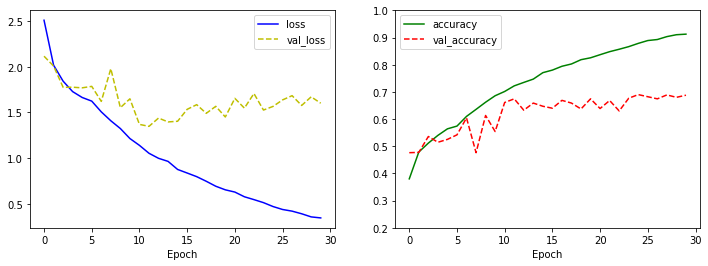

In [ ]:
results = model.evaluate(x_test, y_test)
graph()

##Using GRU : acc = 0.5628

In [ ]:
model = models.Sequential()
model.add(layers.Embedding(10000, 64))
model.add(layers.GRU(64))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                24960     
_________________________________________________________________
dense_7 (Dense)              (None, 46)                2990      
Total params: 667,950
Trainable params: 667,950
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
57/57 [==============================] - 8s 99ms/step - loss: 2.5609 - accuracy: 0.3470 - val_loss: 2.1399 - val_accuracy: 0.3445
Epoch 2/30
57/57 [==============================] - 5s 83ms/step - loss: 2.0251 - accuracy: 0.3976 - val_loss: 1.9781 - val_accuracy: 0.3656
Epoch 3/30
57/57 [==============================] - 5s 81ms/step - loss: 1.8473 - accuracy: 0.48

71/71 [==============================] - 2s 31ms/step - loss: 2.0766 - accuracy: 0.5628


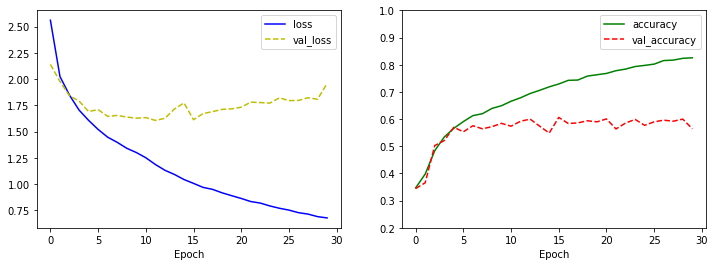

In [ ]:
results = model.evaluate(x_test, y_test)
graph()

#Boston dataset

In [ ]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

##Baseline : mae - 2.6986

In [ ]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [ ]:
all_mae_histories = []
k= 4
num_val_samples = len(train_data) // k 
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]], axis=0)

    model = build_model()

    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


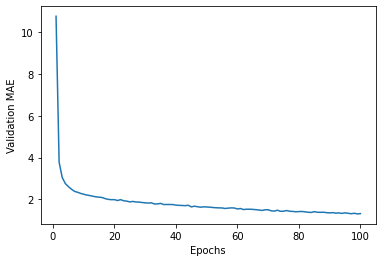

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 16.2916 - mae: 2.6986


##Using RNN : mae - 3.2731

In [ ]:
def build_model_rnn():
    model = models.Sequential()
    model.add(layers.SimpleRNN(64))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [ ]:
k= 4
num_val_samples = len(train_data) // k 
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]], axis=0)

    model = build_model_rnn()

    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 5ms/step - loss: 22.0921 - mae: 3.2731


##Using LSTM : mae - 2.8579

In [ ]:
def build_model_lstm():
    model = models.Sequential()
    model.add(layers.LSTM(64))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [ ]:
train_data=train_data.reshape(train_data.shape[0], 1, train_data.shape[1])
test_data=test_data.reshape(test_data.shape[0], 1, test_data.shape[1])

In [ ]:
k= 4
num_val_samples = len(train_data) // k 
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]], axis=0)

    model = build_model_lstm()

    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 1s 5ms/step - loss: 19.1960 - mae: 2.8579


##Using GRU : mae - 2.4160

In [ ]:
def build_model_gru():
    model = models.Sequential()
    model.add(layers.GRU(64))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [ ]:
k= 4
num_val_samples = len(train_data) // k 
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]], axis=0)

    model = build_model_gru()

    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 1s 5ms/step - loss: 12.4815 - mae: 2.4160
